# Project: Exploratory Data Analysis (Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from over 100,000 movies in the entertainment industry and is particularly focused on the ratings of each movie. A number of charateristics about the movies are included in each observation. 21 features are associated with each observation and are listed as follows: 
* id - the unique identification number of the movies
* imdb_id - each movie's imdb generated identity number
* popularity - popularity of each movie
* budget - budget of each movie as at when released
* revenue - revenue of each movie as at when released
* original title - title of each movie
* cast - this shows the entire cast starting from the first cast member featured in the credits
* homepage - website landing page of each movie 
* director - the director of the movie
* tagline - the catchphrase of the movie
* overview - brief description of each movie
* runtime - the duration of each movie including the credits in minutes
* genres - a collation of the associated genres of each movie
* production_companies - the group of companies/studios that collaborated on a particular movie
* release_date - the release date of the movie
* vote_count - total number of rating votes received for a movie
* vote_average - average number of ratings
* release year - the year the movie was released for pyblic consumption
* budget_adj - adjusted budget taking into account inflation from the time the movie was released
* revenue_adj - adjusted revenue taking into account inflation from the time the movie was released

### Patterns/Questions this analysis will be looking to uncover and answer
  1. The genres that have generated the most revenue.
  2. The directors with the highest average ratings .
  3. Does the budget of a movie affect the profit?
  4. Is average rating a determining factor for profit?

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading dataset into dataframe
df = pd.read_csv("tmdb-movies.csv")

#checking dataframe structure
df.shape

(10866, 21)

In [3]:
#checking the first 5 rows and overlook of the columns content
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#confirming the datatypes of each column and taking necessary observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#checking for columns with missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#checking for duplicates in the dataset
df.duplicated().any()

True

In [7]:
#checking out the director column for the total number of unique directors
df.director.nunique()

5067

### Data Cleaning 

> There are 10,866 observations and  21 features.
  The release date is labelled as a string type column and should be converted to a date-time format.
  I will have to drop some columns that will not be useful in my analysis and also drop duplicated rows. The adjusted revenue and budget columns will have to be   formatted for readability and analytical purposes. I will create a profit column by using calculations from other columns. I also split "genres" column and then exploded it so as to extract each genre from the unclean column.

In [8]:
#wrangle function for cleaning dataframe
def wrangle(filepath):
    #read csv file
    df = pd.read_csv(filepath)
    
    #drop columns
    df.drop(columns=["homepage", "production_companies", "id", "revenue", "budget", "tagline", "imdb_id", "keywords", "overview", "runtime", "vote_count", "cast"], inplace=True)
    
    #drop duplicated rows
    df.drop_duplicates(inplace=True)
    
    #dropping rows with null values
    df.dropna(inplace=True)
    
    #converting release date column to date-time
    df["release_date"] = pd.to_datetime(df["release_date"])
    
    #dropping rows with 0 as value in the budget/revenue columns
    df.drop(df[df['budget_adj'] == 0].index, inplace = True)
    df.drop(df[df['revenue_adj'] == 0].index, inplace = True)
    
    #format budget_adj column
    df["budget_adj"] = df["budget_adj"].apply("{0:,.0f}".format).str.replace(",", "").astype("float")
    
    #format revenue_adj column
    df["revenue_adj"] = df["revenue_adj"].apply("{:,.0f}".format).str.replace(",", "").astype("float")
    
    #create profit column
    df["profit"] = (df["revenue_adj"] - df["budget_adj"]).apply("{0:,.0f}".format).str.replace(",", "").astype("float")
    
    #making the dataframe free of exponentials for readability purposes
    df = df.astype({'budget_adj':'int64', 'revenue_adj':'int64', 'profit':'int64'})
   
    #exploding the genre column to get each genre
    df["genres"] = df["genres"].str.split("|")
    df = df.explode("genres").reset_index()
    
    #drop index column
    df.drop(columns=["index"], inplace=True)
    
    
    
    return df
    

In [9]:
df = wrangle("tmdb-movies.csv")
print(df.shape)
df.head()

(10299, 10)


,popularity,original_title,director,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Colin Trevorrow,Action,2015-06-09,6.5,2015,137999939,1392445893,1254445954
1,32.985763,Jurassic World,Colin Trevorrow,Adventure,2015-06-09,6.5,2015,137999939,1392445893,1254445954
2,32.985763,Jurassic World,Colin Trevorrow,Science Fiction,2015-06-09,6.5,2015,137999939,1392445893,1254445954
3,32.985763,Jurassic World,Colin Trevorrow,Thriller,2015-06-09,6.5,2015,137999939,1392445893,1254445954
4,28.419936,Mad Max: Fury Road,George Miller,Action,2015-05-13,7.1,2015,137999939,348161292,210161353


In [10]:
#checking the datatype and non null values in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10299 non-null  float64       
 1   original_title  10299 non-null  object        
 2   director        10299 non-null  object        
 3   genres          10299 non-null  object        
 4   release_date    10299 non-null  datetime64[ns]
 5   vote_average    10299 non-null  float64       
 6   release_year    10299 non-null  int64         
 7   budget_adj      10299 non-null  int64         
 8   revenue_adj     10299 non-null  int64         
 9   profit          10299 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 804.7+ KB


In [11]:
#checking again for columns with null values
df.isnull().sum()

popularity        0
original_title    0
director          0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

> Before we start finding patterns and ansering questions let's do a little bit of wrangling


In [12]:
#check dataframe summary statistics 
df.describe()

,popularity,vote_average,release_year,budget_adj,revenue_adj,profit
count,10299.000000,10299.000000,10299.000000,1.029900e+04,1.029900e+04,1.029900e+04
mean,1.262572,6.156238,2000.919118,4.955257e+07,1.517988e+08,1.022462e+08
std,1.607808,0.789817,11.278677,4.766435e+07,2.324439e+08,2.094165e+08
min,0.001117,2.200000,1960.000000,1.000000e+00,2.000000e+00,-4.139124e+08
25%,0.477489,5.700000,1995.000000,1.554024e+07,2.042883e+07,-2.156880e+06
50%,0.843170,6.200000,2004.000000,3.454345e+07,6.847909e+07,2.990025e+07
75%,1.462309,6.700000,2010.000000,6.960312e+07,1.825920e+08,1.205996e+08
max,32.985763,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


Notice how the max value of popularity is way above the 75th percentile? This needs more exploration!

C:\Users\subomi\AppData\Local\Temp\ipykernel_17232\3098524099.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax);


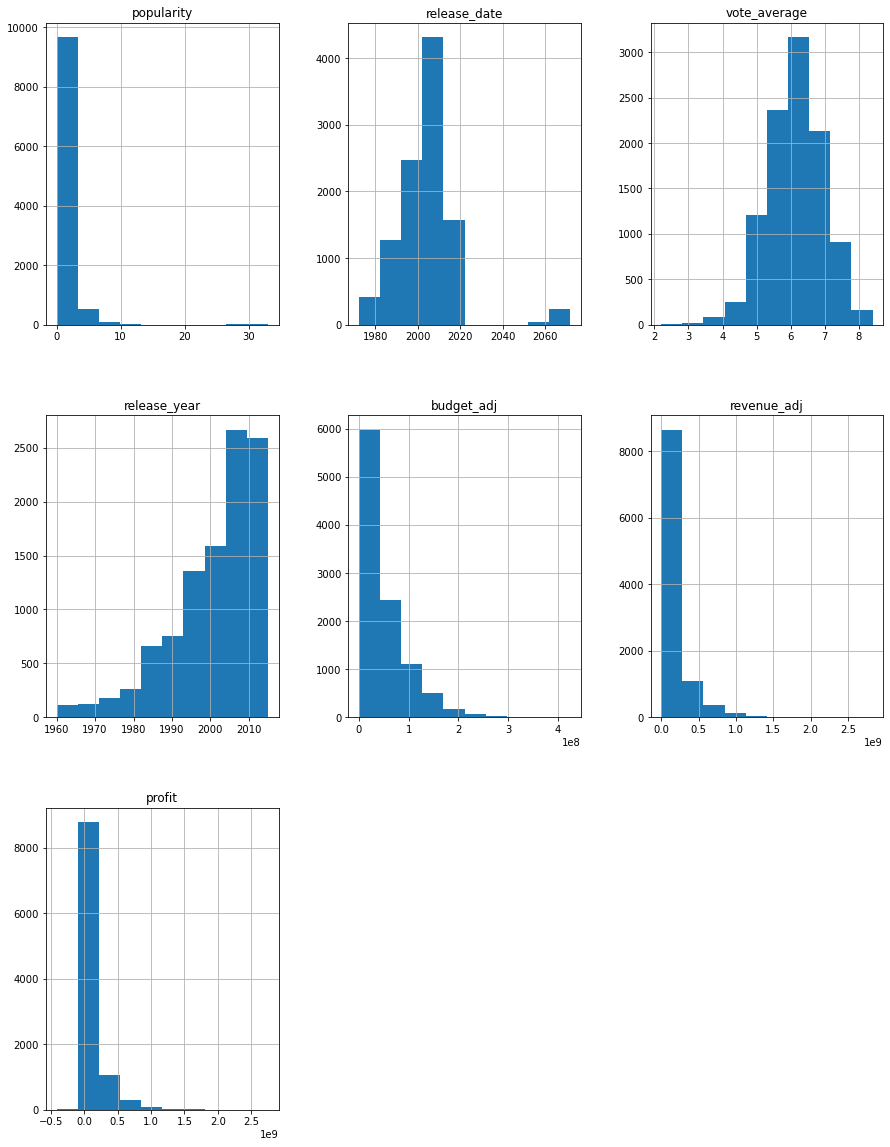

In [13]:
#dataframe histogram plots
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

From the above histogram plots we can notice a few things such as budget, revenue, profit and popularity being greatly skewed to the right, these are expected because the maximum values of those columns are way above the median. Now it is time to check out the popularity feature.

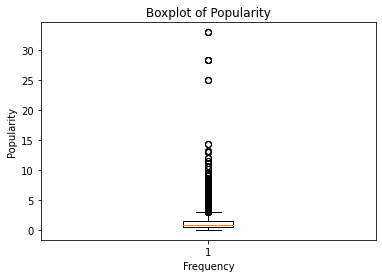

In [14]:
#creating boxplot
plt.boxplot(df["popularity"])
plt.xlabel("Frequency")
plt.ylabel("Popularity")
plt.title("Boxplot of Popularity");

From the boxplot it can be inferred that those observations at the extreme top are outliers but we will not remove them for the sake of the analysis since we are not putting it into a machine learning algorithm. Now we can move into our questions.

### Research Question 1 (Genres that generate the most revenue)

In [15]:
#working on x vaiable
genrez = df["genres"].unique()

In [16]:
#working on y variable
sums = df.groupby("genres").sum()
y = list(sums['revenue_adj'].sort_values(ascending=False))

#cross-checking 
y

[211995913067,
 203284194365,
 178009446712,
 164725841139,
 154317757116,
 104917480904,
 103611187977,
 98997129640,
 75706596118,
 71867233018,
 58482433839,
 39085630799,
 37691235022,
 18551875296,
 18300978166,
 15694362448,
 7055087906,
 868215803,
 154398459,
 58389103]

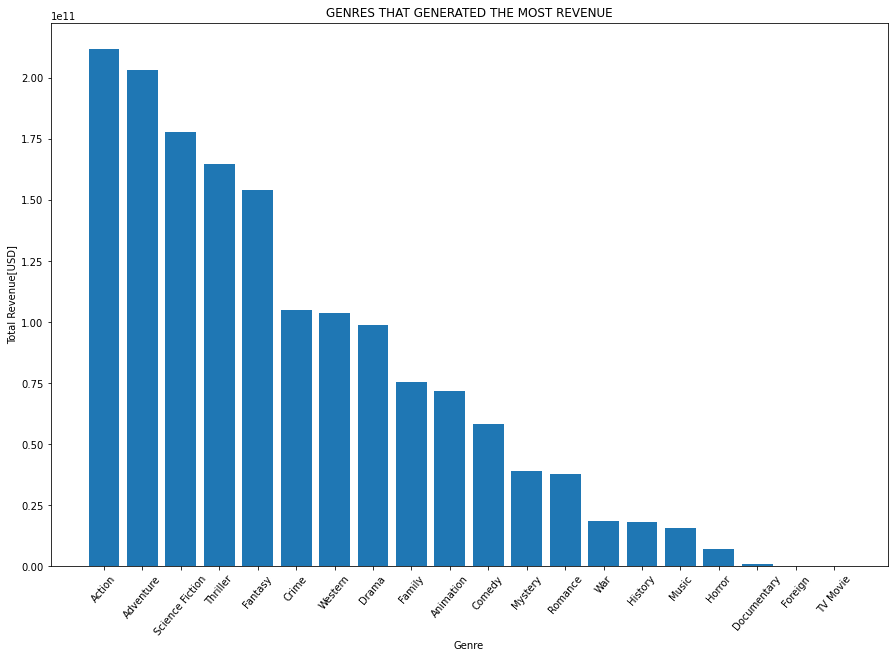

In [17]:
#visualizing our findings
plt.figure(figsize=(15, 10))
plt.bar(genrez, y)
plt.xlabel('Genre')
plt.xticks(rotation = 50)
plt.ylabel('Total Revenue[USD]')
plt.title('GENRES THAT GENERATED THE MOST REVENUE');

**Action** movies generate the most revenue while **TV Movie** generates the least!

### Research Question 2  (The directors with the highest average ratings)

In [18]:
# checking for the number of unique directors
df["director"].nunique()

1713

In [19]:
#grouping director with ratings
meaned = df.groupby("director")["vote_average"].mean()

In [20]:
#variable containing director ratings
zy = meaned.sort_values(ascending=False).head(10)
zy

director
Damien Chazelle       8.2
Xavier Dolan          8.0
Morten Tyldum         8.0
Lenny Abrahamson      8.0
Pete Docter           8.0
Tony Kaye             8.0
Louis C.K.            7.9
Josh Boone            7.8
Rajkumar Hirani       7.8
Ashutosh Gowariker    7.8
Name: vote_average, dtype: float64

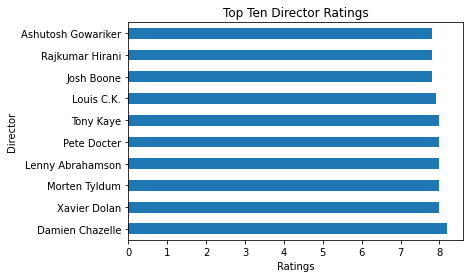

In [21]:
#plotting graph
zy.plot(kind="barh")
plt.xlabel("Ratings")
plt.ylabel("Director")
plt.title("Top Ten Director Ratings");

 Damien Chazelle is the director with the highest ratings!

### Research Question 3  (Does the budget of a movie influence the profit?)

> Here we will create a scatter plot function to avoid repetition in the next question

In [22]:
#creating a scatter plot function
def s_c(x, y, tit, xl, yl):
    
    #adding points and plot
    plt.figure(figsize=(10,5))
    plt.scatter(x, y)
    
    #add line of best fit to plot
    plt.plot(x, a*x+b, color="red")
    
    #scatterplot characteristics
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(tit)


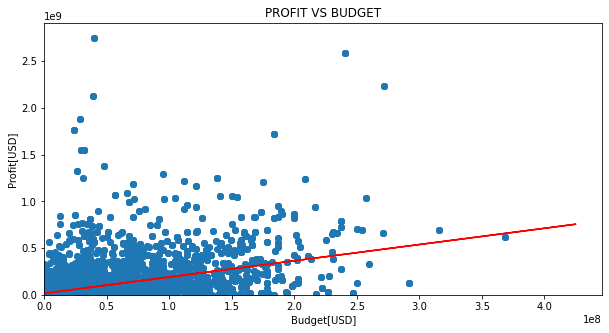

In [24]:
#plotting scatterplot
b1 = df['budget_adj']
p1 = df['profit']
a, b = np.polyfit(b1, p1, 1)

s_c(b1, p1, 'PROFIT VS BUDGET','Budget[USD]', 'Profit[USD]')

In [25]:
#confirming our visualization
df["budget_adj"].corr(df["profit"])

0.3958752253912546

From our exploration and visualizations we can safely say there is a __weak positive correlation__ between the budget and profit of movies.

### Research Question 4  (Is the average rating a determining factor for profit?)

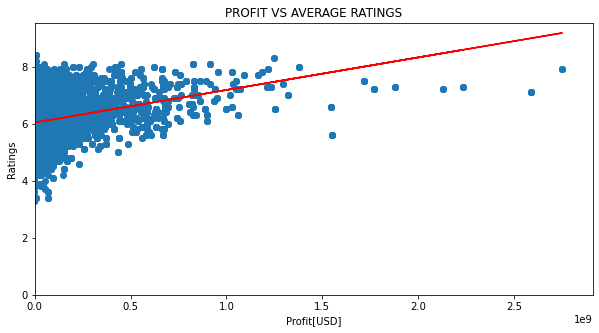

In [26]:
#plotting scatterplot
r1 = df['vote_average']
p1 = df['profit']
a, b = np.polyfit(p1, r1, 1)

s_c(p1, r1, 'PROFIT VS AVERAGE RATINGS', 'Profit[USD]', 'Ratings')

In [27]:
#confirming our visualization
df["vote_average"].corr(df["profit"])

0.3028286106503561

From our EDA and visualizations we can deduce that there is a __positve correlation__ between the average rating and profits __albeit weak__.

<a id='conclusions'></a>
## Conclusions

#### Recap on questions asked and Key Insights

1) Genres that generate the most revenue
 - We found out that Action movies generate the most revenue while TV Movie generates the least!
 
2) The directors with the highest average ratings
 - We found out that Damien Chazelle is the director with the highest ratings!
 
3) Does the budget of a movie influence the profit?
 - We found out that there is a weak positive correlation between the budget and profit of movies.
 
4) Is the average rating a determining factor for profit?
 - We found out that there is a positve correlation between the average rating and profits albeit weak.
 

## Limitations
 - The metrics for the popularity column is unknown as we do not know if it is rated over 100 or 40 or 50
 - There were a lot of rows in the adjusted budget and revenue columns with 0 as values and they had to be removed
 

## References

 <a> www.stackoverflow.com </a>